In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#imported all necessary libraries

In [3]:
#dataset1
data = pd.read_csv('athlete_events.csv')
#dataset2
regions = pd.read_csv('noc_regions.csv')
#merged-dataset
merged = pd.merge(data, regions, on='NOC', how='left')

# Summer Olympics

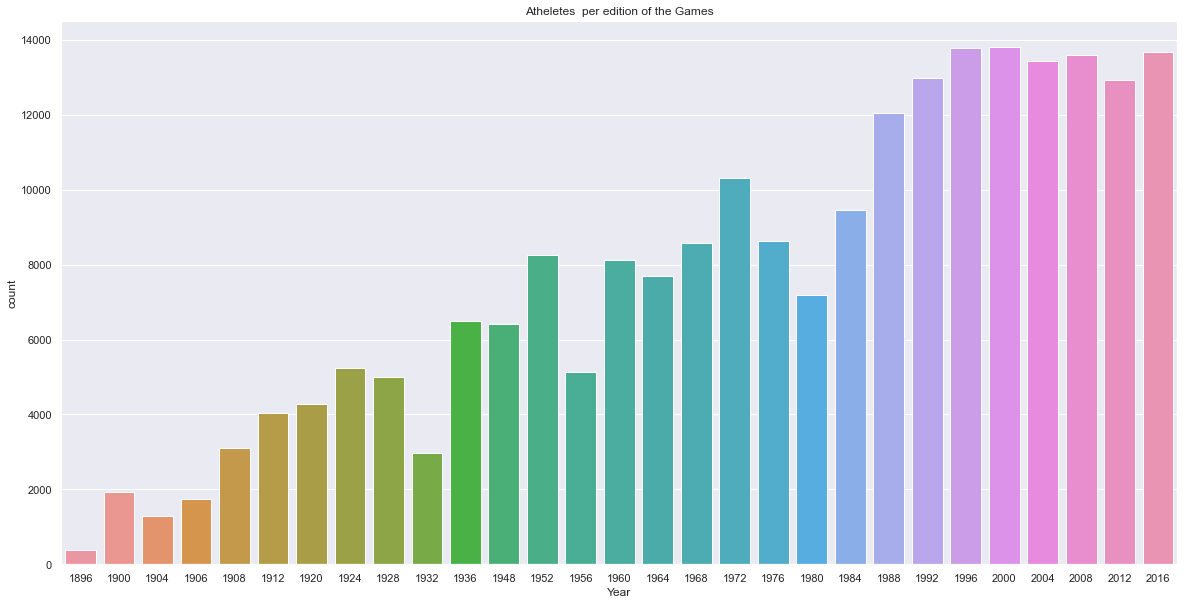

In [45]:
athletesInSOlympics = merged[merged.Season == 'Summer']
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=athletesInSOlympics)
plt.title('Atheletes  per edition of the Games')
plt.show()

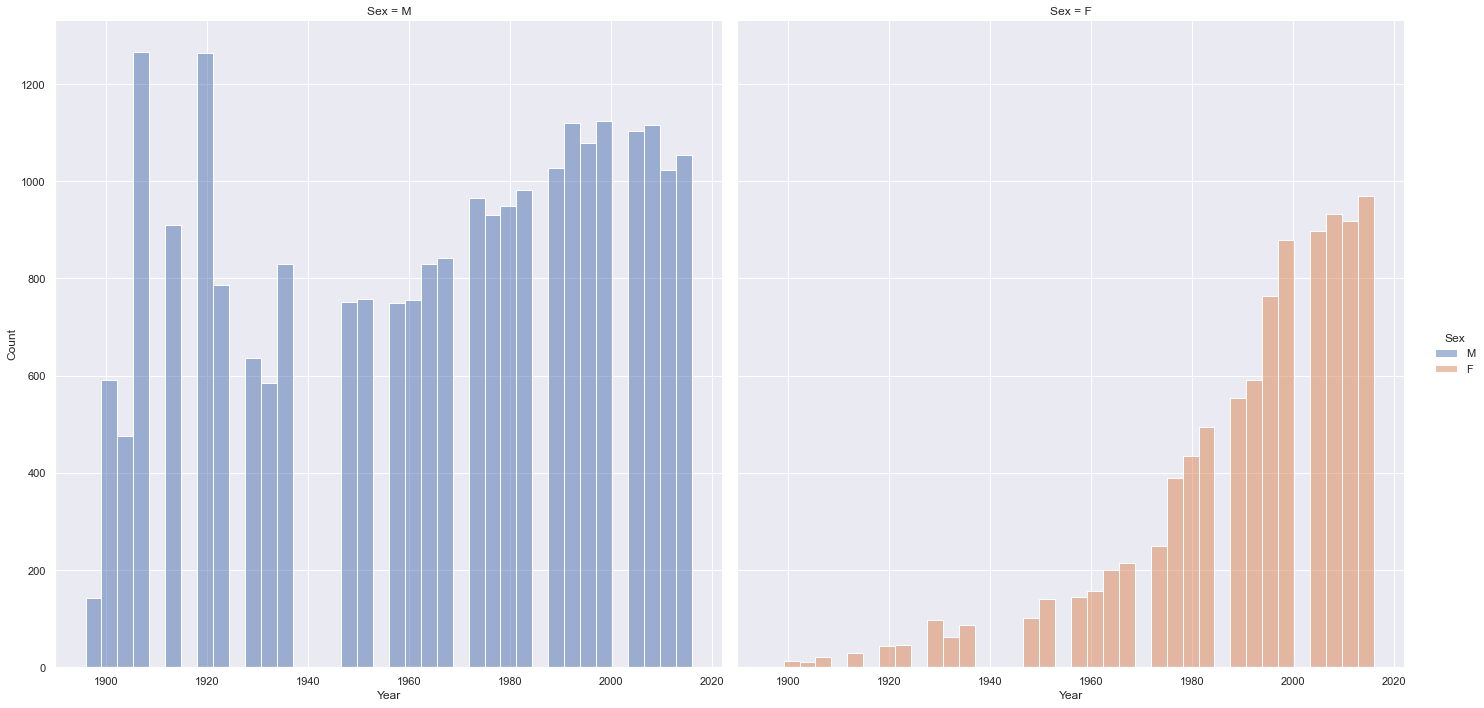

In [59]:
sns.set(style="darkgrid")
sns.displot(x='Year', data=athletesInSOlympics, hue="Sex", col="Sex",height=10, aspect=1)
plt.show()

# Winter Olympics

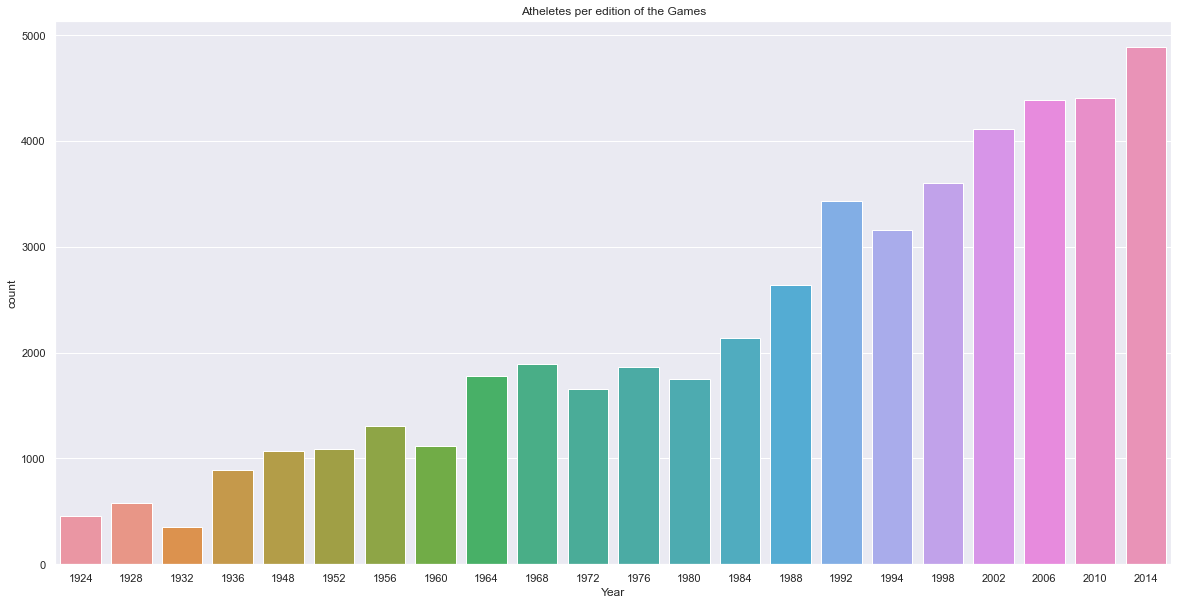

In [47]:
athletesInWOlympics = merged[merged.Season == 'Winter']
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=athletesInWOlympics)
plt.title('Atheletes per edition of the Games')
plt.show()

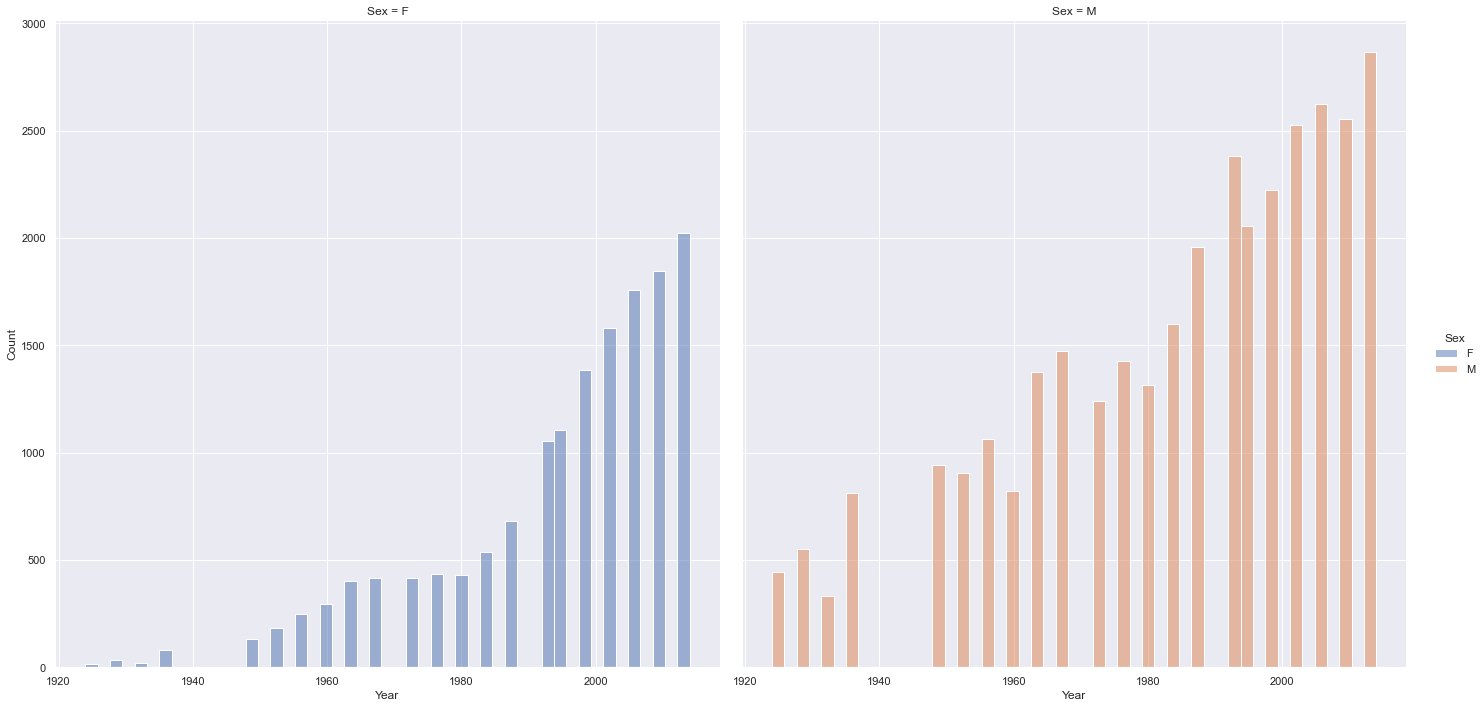

In [58]:
sns.set(style="darkgrid")
sns.displot(x='Year', data=athletesInWOlympics, hue="Sex", col="Sex",height=10, aspect=1)
plt.show()

In [60]:
#clearing all non-medalist
athletesInSOlympics = athletesInSOlympics.dropna(subset=['Medal'])
athletesInWOlympics = athletesInSOlympics.dropna(subset=['Medal'])

In [53]:
athletesInSOlympics.info()
athletesInSOlympics.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34088 entries, 3 to 271103
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      34088 non-null  int64  
 1   Name    34088 non-null  object 
 2   Sex     34088 non-null  object 
 3   Age     33367 non-null  float64
 4   Height  26098 non-null  float64
 5   Weight  25598 non-null  float64
 6   Team    34088 non-null  object 
 7   NOC     34088 non-null  object 
 8   Games   34088 non-null  object 
 9   Year    34088 non-null  int64  
 10  Season  34088 non-null  object 
 11  City    34088 non-null  object 
 12  Sport   34088 non-null  object 
 13  Event   34088 non-null  object 
 14  Medal   34088 non-null  object 
 15  region  34079 non-null  object 
 16  notes   538 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 4.7+ MB


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,NaN
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
50,17,Paavo Johannes Aaltonen,M,32.0,175.0,64.0,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around,Bronze,Finland,NaN
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway,NaN
86,25,Alf Lied Aanning,M,24.0,NaN,NaN,Norway,NOR,1920 Summer,1920,Summer,Antwerpen,Gymnastics,"Gymnastics Men's Team All-Around, Free System",Silver,Norway,NaN


# India In Olympics

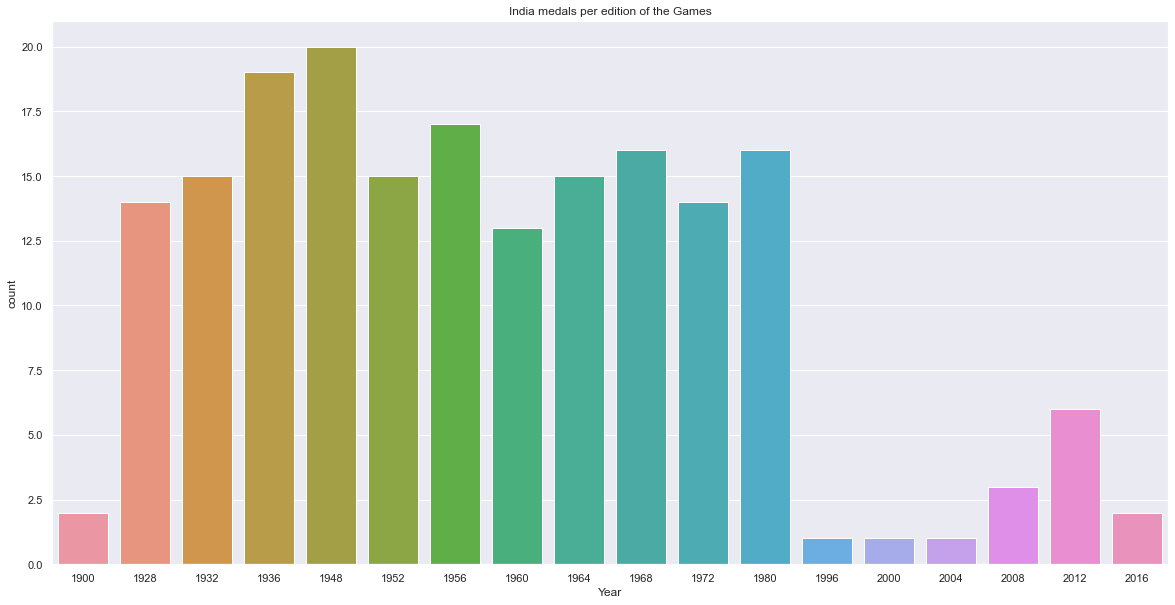

In [6]:
indiaInOlympics = merged[(merged.region == 'India')&(merged.Season == 'Summer')&((merged.Medal == 'Gold')|(merged.Medal == 'Silver')|(merged.Medal == 'Bronze'))]

sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=indiaInOlympics)
plt.title('India medals per edition of the Games')
plt.show()

In [18]:
onlyIndia=indiaInOlympics[['Year','Medal']].copy()
onlyIndia.dropna()

,Year,Medal
4732,1928,Gold
4736,1964,Gold
5032,1928,Gold
5033,1932,Gold
5034,1936,Gold
...,...,...
233749,1980,Gold
236445,1932,Gold
236446,1936,Gold
250689,1948,Gold


# Countries standing in summer olympics 

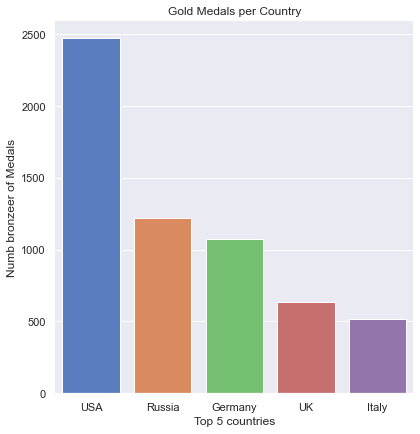

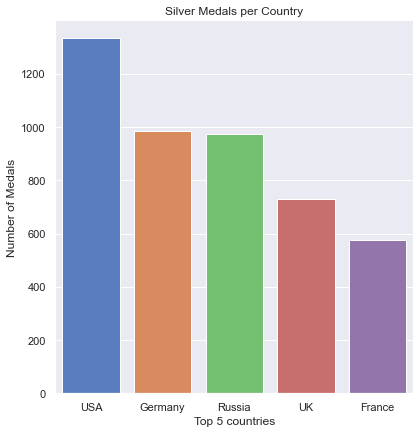

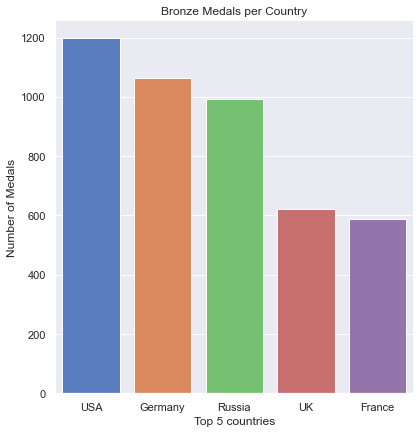

In [8]:
#5 countries with most Gold medals summer
goldMedals = merged[(merged.Medal == 'Gold')&(merged.Season == 'Summer')]
totalGoldMedals = goldMedals.region.value_counts().reset_index(name='Medal').head(5)
g = sns.catplot(x="index", y="Medal", data=totalGoldMedals,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Top 5 countries")
g.set_ylabels("Numb bronzeer of Medals")
plt.title('Gold Medals per Country')
plt.show(3,1) 

#5 countries with most silver medals summer
silverMedals = merged[(merged.Medal == 'Silver')&(merged.Season == 'Summer')]
totalSilverMedals = silverMedals.region.value_counts().reset_index(name='Medal').head(5)
g = sns.catplot(x="index", y="Medal", data=totalSilverMedals,
                height=6, kind="bar", palette="muted")

g.set_xlabels("Top 5 countries")
g.set_ylabels("Number of Medals")
plt.title('Silver Medals per Country')
plt.show(3,2)

##5 countries with most bronze medals summer
bronzeMedals = merged[(merged.Medal == 'Bronze')&(merged.Season == 'Summer')]
totalBronzeMedals = bronzeMedals.region.value_counts().reset_index(name='Medal').head(5)
g = sns.catplot(x="index", y="Medal", data=totalBronzeMedals,
                height=6, kind="bar", palette="muted")

g.set_xlabels("Top 5 countries")
g.set_ylabels("Number of Medals")
plt.title('Bronze Medals per Country')
plt.show(3,3)

In [9]:
print("Summer Olympics")
print("\nGold")
print("----------------------------------------")
print(goldMedals.region.value_counts().reset_index(name='Medal').head())
print("----------------------------------------")
print("Silver")
print("----------------------------------------")
print(silverMedals.region.value_counts().reset_index(name='Medal').head())
print("----------------------------------------")
print("Bronze")
print("----------------------------------------")
print(bronzeMedals.region.value_counts().reset_index(name='Medal').head())
print("----------------------------------------")

Summer Olympics

Gold
----------------------------------------
     index  Medal
0      USA   2472
1   Russia   1220
2  Germany   1075
3       UK    636
4    Italy    518
----------------------------------------
Silver
----------------------------------------
     index  Medal
0      USA   1333
1  Germany    987
2   Russia    974
3       UK    729
4   France    575
----------------------------------------
Bronze
----------------------------------------
     index  Medal
0      USA   1197
1  Germany   1064
2   Russia    994
3       UK    620
4   France    587
----------------------------------------


#  Countries standing in Winter Olympics

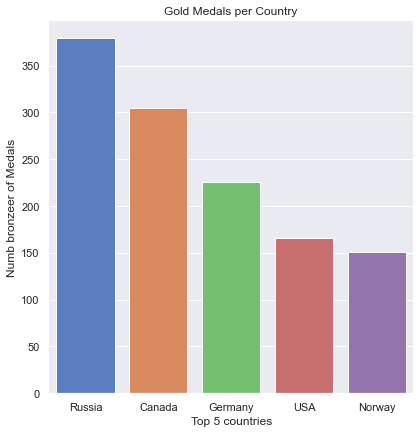

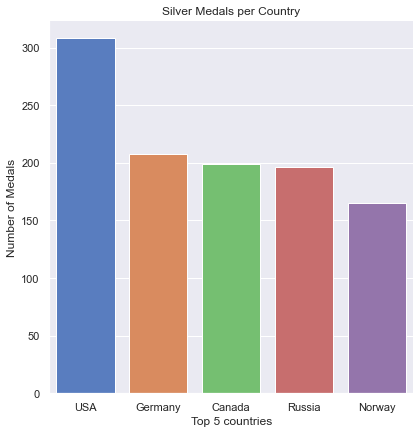

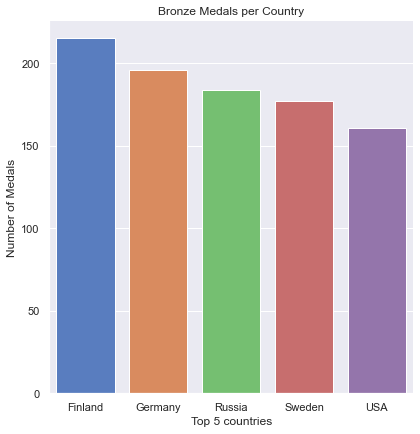

In [10]:
#5 countries with most Gold medals winter
goldMedals = merged[(merged.Medal == 'Gold')&(merged.Season == 'Winter')]
totalGoldMedals = goldMedals.region.value_counts().reset_index(name='Medal').head(5)
g = sns.catplot(x="index", y="Medal", data=totalGoldMedals,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Top 5 countries")
g.set_ylabels("Numb bronzeer of Medals")
plt.title('Gold Medals per Country')
plt.show(3,1) 

#5 countries with most silver medals winter
silverMedals = merged[(merged.Medal == 'Silver')&(merged.Season == 'Winter')]
totalSilverMedals = silverMedals.region.value_counts().reset_index(name='Medal').head(5)
g = sns.catplot(x="index", y="Medal", data=totalSilverMedals,
                height=6, kind="bar", palette="muted")

g.set_xlabels("Top 5 countries")
g.set_ylabels("Number of Medals")
plt.title('Silver Medals per Country')
plt.show(3,2)

##5 countries with most bronze medals winter
bronzeMedals = merged[(merged.Medal == 'Bronze')&(merged.Season == 'Winter')]
totalBronzeMedals = bronzeMedals.region.value_counts().reset_index(name='Medal').head(5)
g = sns.catplot(x="index", y="Medal", data=totalBronzeMedals,
                height=6, kind="bar", palette="muted")

g.set_xlabels("Top 5 countries")
g.set_ylabels("Number of Medals")
plt.title('Bronze Medals per Country')
plt.show(3,3)

In [11]:
print("Winter Olympics")
print("\nGold")
print("----------------------------------------")
print(goldMedals.region.value_counts().reset_index(name='Medal').head())
print("----------------------------------------")
print("Silver")
print("----------------------------------------")
print(silverMedals.region.value_counts().reset_index(name='Medal').head())
print("----------------------------------------")
print("Bronze")
print("----------------------------------------")
print(bronzeMedals.region.value_counts().reset_index(name='Medal').head())
print("----------------------------------------")

Winter Olympics

Gold
----------------------------------------
     index  Medal
0   Russia    379
1   Canada    305
2  Germany    226
3      USA    166
4   Norway    151
----------------------------------------
Silver
----------------------------------------
     index  Medal
0      USA    308
1  Germany    208
2   Canada    199
3   Russia    196
4   Norway    165
----------------------------------------
Bronze
----------------------------------------
     index  Medal
0  Finland    215
1  Germany    196
2   Russia    184
3   Sweden    177
4      USA    161
----------------------------------------


E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


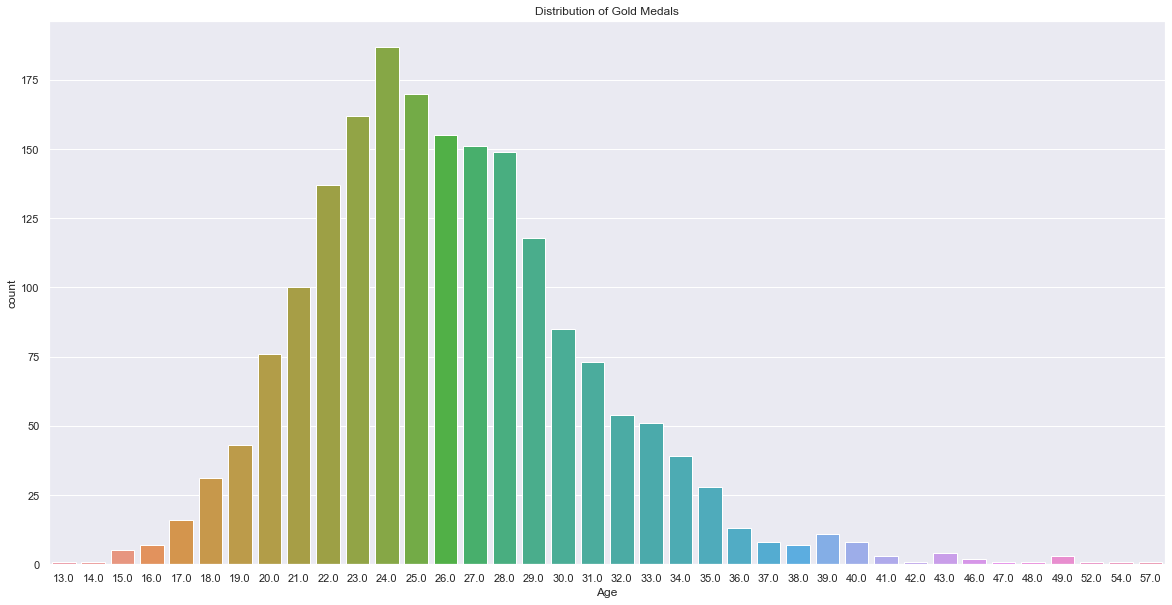

In [12]:
plt.figure(figsize=(20, 10))
plt.title('Distribution of Gold Medals')
sns.countplot(goldMedals['Age'])
plt.show()

In [13]:
max(goldMedals['Age'])

57.0

In [61]:
from statistics import mean
mean(goldMedals['Age'])

nan

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271078,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
271082,135554,Bogusaw Zych,M,28.0,182.0,82.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze


In [31]:
goldMedals['Age'].describe()

count    1904.000000
mean       26.157038
std         4.888996
min        13.000000
25%        23.000000
50%        26.000000
75%        29.000000
max        57.000000
Name: Age, dtype: float64